In [1]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import mglearn

In [4]:
#폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
#한글 폰트 적용
import matplotlib as mpl
import matplotlib.pyplot as plt 

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

#파일 불러오기

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns      

In [5]:
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IT와 비즈니스 혁신/data/health_data.csv")

display(health.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


#데이터 전처리

In [8]:
display(health.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

None

In [6]:
health = health.drop(health.columns[[15, 16, 17, 18, 28, 29]], axis=1)
display(health.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0,12/29/2021


In [7]:
health = health.dropna(axis=0)
print("결측행 모두 제거: ", health.shape)

결측행 모두 제거:  (9858, 25)


In [8]:
display(health.isna().sum())

기준년도           0
가입자일련번호        0
시도코드           0
성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
데이터공개일자        0
dtype: int64

In [9]:
health['BMI'] = 0
health['BMI'] = health['체중(5Kg 단위)'] / ((health['신장(5Cm단위)'] / 100) ** 2)
health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,데이터공개일자,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.0,1.1,21.0,27.0,21.0,No,No,0,12/29/2021,22.038567
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,1.0,0.5,18.0,15.0,15.0,No,No,0,12/29/2021,28.888889
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,1.0,0.7,27.0,25.0,7.0,No,No,0,12/29/2021,22.892820
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.0,1.2,65.0,97.0,72.0,No,No,1,12/29/2021,27.343750
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,1.0,0.7,18.0,17.0,14.0,No,No,0,12/29/2021,20.811655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2020,9995,41,M,17,150,55,95.0,0.5,0.8,...,1.0,1.1,22.0,21.0,18.0,No,No,0,12/29/2021,24.444444
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,1.0,0.7,20.0,21.0,20.0,No,Yes,0,12/29/2021,22.892820
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,1.0,0.7,24.0,22.0,21.0,No,Yes,1,12/29/2021,21.484375
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,1.0,22.0,27.0,35.0,No,No,0,12/29/2021,31.250000


In [10]:
health['obesity'] = 0

health.loc[(health['BMI'] >= 25) & (health['성별코드'] == 'F') & (health['허리둘레'] >= 85), 'obesity'] = 'Y'
health.loc[(health['BMI'] >= 25) & (health['성별코드'] == 'M') & (health['허리둘레'] >= 90), 'obesity'] = 'Y'
health.loc[(health['BMI'] < 25), 'obesity'] = 'N'
health.loc[(health['성별코드'] == 'F') & (health['허리둘레'] < 85), 'obesity'] = 'N'
health.loc[(health['성별코드'] == 'M') & (health['허리둘레'] < 90), 'obesity'] = 'N'

health.head(20)

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,데이터공개일자,BMI,obesity
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,12/29/2021,22.038567,N
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,12/29/2021,28.888889,N
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,12/29/2021,22.892820,N
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,12/29/2021,27.343750,Y
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,12/29/2021,20.811655,N
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,1.1,25.0,32.0,26.0,Yes,Yes,0,12/29/2021,24.835646,N
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,12/29/2021,29.384757,Y
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,Yes,No,1,12/29/2021,25.390625,Y
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,0.7,42.0,48.0,39.0,No,No,0,12/29/2021,22.222222,N
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,0.6,22.0,11.0,10.0,No,No,0,12/29/2021,20.000000,N


N    7625
Y    2233
Name: obesity, dtype: int64


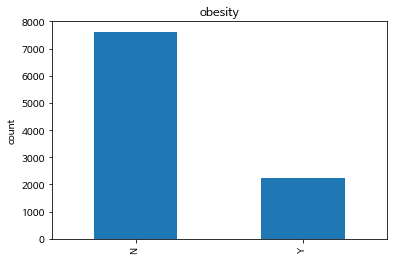

In [11]:
print(health['obesity'].value_counts())

health['obesity'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('obesity')
plt.show()

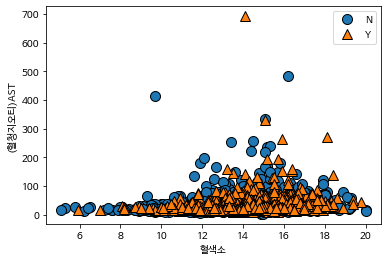

In [12]:
mglearn.discrete_scatter(health['혈색소'], health['(혈청지오티)AST'], health['obesity'])
plt.xlabel("혈색소")
plt.ylabel("(혈청지오티)AST")
plt.legend()
plt.show()

#의사결정 나무

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.iloc[:, 14:19] #식전혈당(공복혈당), 혈색소, 요단백, 혈청크레아티닌, (혈청지오티)AST
y = health['obesity']

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.998
시험용 데이터 정확도: 0.665


In [14]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.775
시험용 데이터 정확도: 0.776


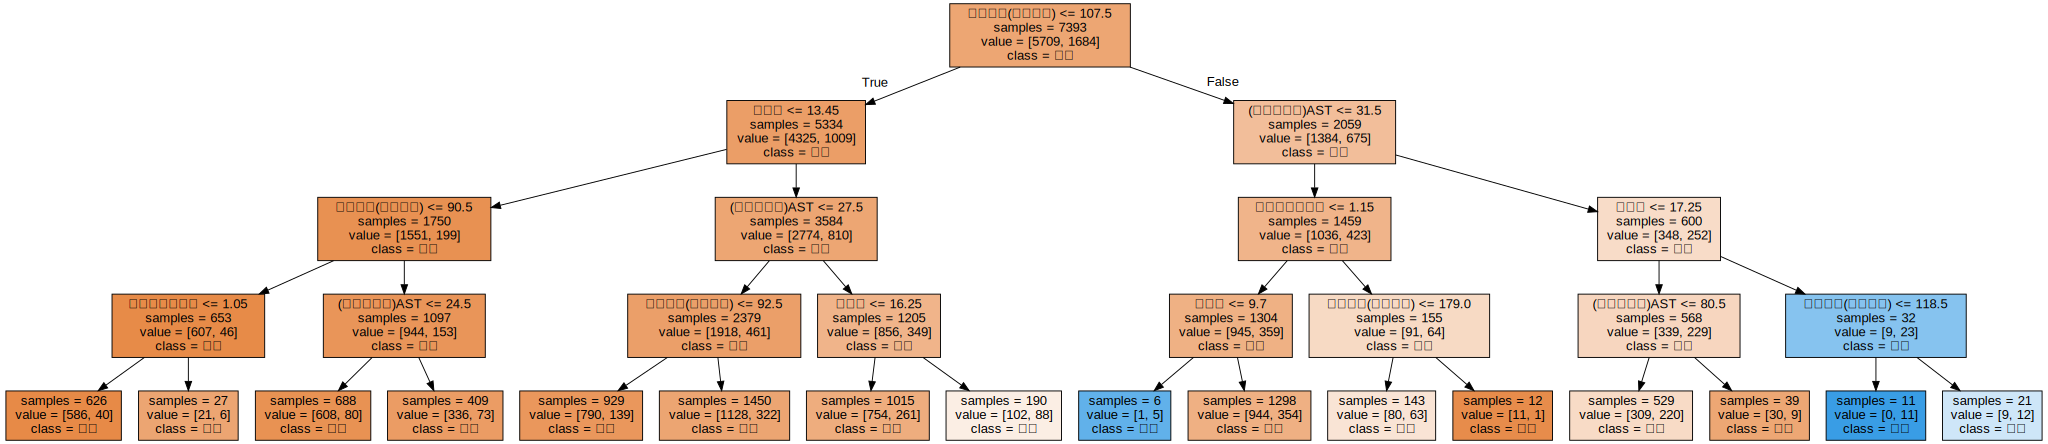

In [15]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "정상", "비만"],
                feature_names=health.columns[14:19], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [16]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.43756254 0.32024875 0.         0.03951803 0.20267068]


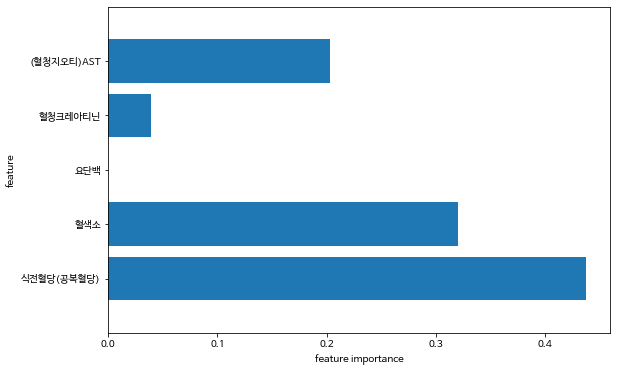

In [17]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[14:19])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[14:19])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) 

plot_feature_importances_health(tree)

In [18]:
res = pd.DataFrame(result)
res["name"] = health.columns[14:19]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5 non-null      float64
 1   name    5 non-null      object 
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


None

,0,name
4,0.202671,(혈청지오티)AST
0,0.437563,식전혈당(공복혈당)
2,0.000000,요단백
1,0.320249,혈색소
3,0.039518,혈청크레아티닌


#랜덤 포레스트

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


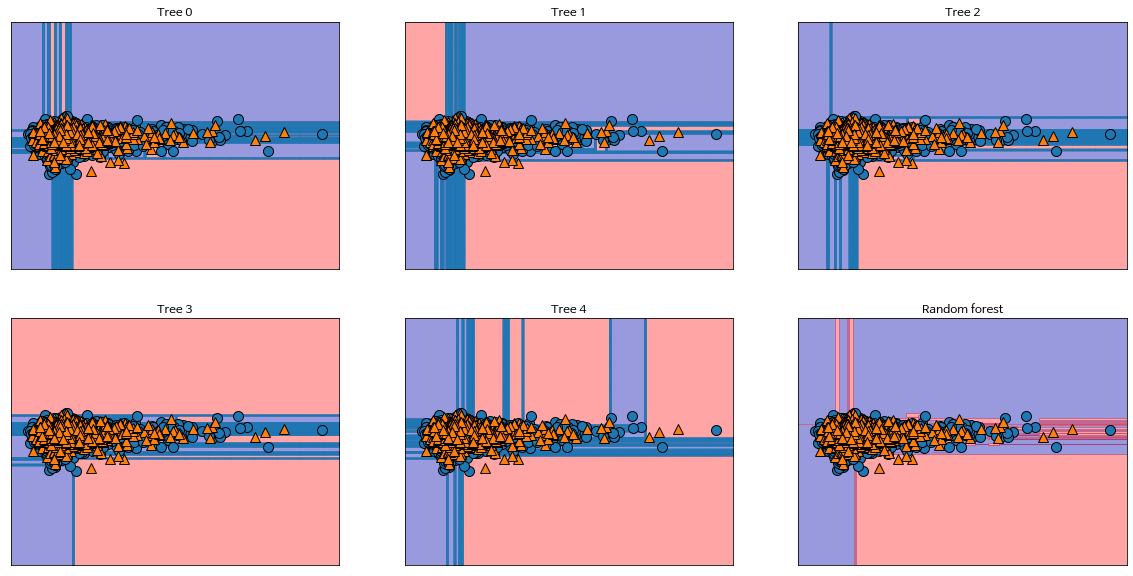

In [19]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [20]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.997
시험용 데이터 세트 정확도: 0.753


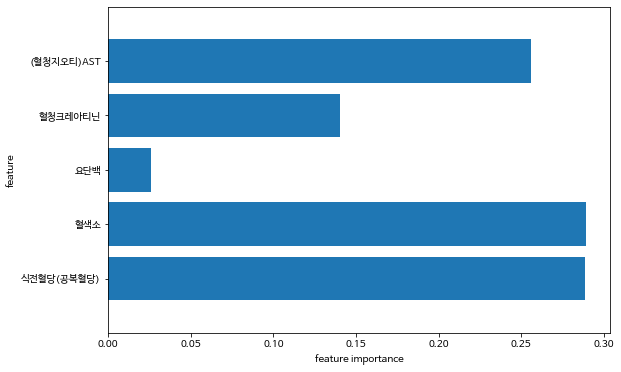

In [21]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_health(forest)

#랜덤 포레스트와 단일 의사결정나무 비교

In [22]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.66486486 0.69189189 0.65945946 0.65358593 0.70635995 0.66576455
 0.68064953 0.65764547 0.67253045 0.67388363]
Random forest:  [0.73648649 0.75945946 0.74459459 0.74966171 0.74695535 0.75778078
 0.75778078 0.74154263 0.75101488 0.76048714]
Accuracy mean
Decision tree :0.673
Random forest :0.751


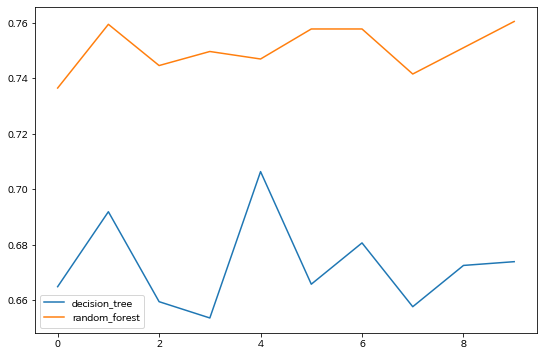

In [23]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

랜덤 포레스트의 정확도가 더 높다.

#그래디언트 부스팅

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [25]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.786
시험용 데이터 세트 정확도: 0.772


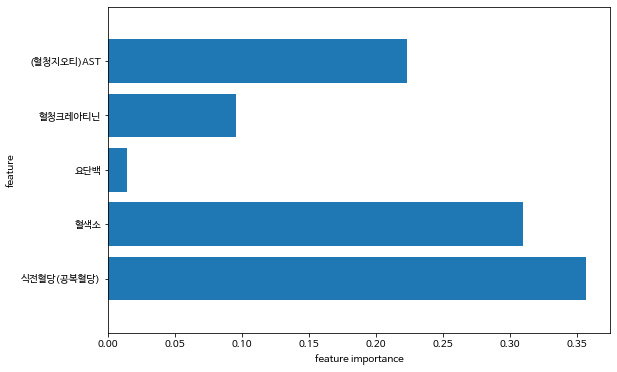

In [26]:
plot_feature_importances_health(gbrt)

차이가 크지는 않지만, 학습용 데이터의 정확도가 더 높음.

In [27]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.778
시험용 데이터 세트 정확도: 0.775


In [28]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.772
시험용 데이터 세트 정확도: 0.777


학습률을 낮췄을 때, 시험용 데이터 세트의 정확도가 가장 높게 측정됨.

#분류 모델 평가

##교차 검증

In [29]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.66486486 0.69189189 0.65945946 0.65358593 0.70635995 0.66576455
 0.68064953 0.65764547 0.67253045 0.67388363]
Random forest:  [0.73648649 0.75945946 0.74459459 0.74966171 0.74695535 0.75778078
 0.75778078 0.74154263 0.75101488 0.76048714]
Gradient boosting:  [0.77162162 0.77162162 0.77162162 0.77266576 0.77266576 0.77266576
 0.77266576 0.77266576 0.77266576 0.77131258]
Accuracy mean
Decision tree :0.673
Random forest :0.751
Gradient boosting :0.772


In [30]:
# 교차 검증 상세 옵션 지정

# KFold :기본값 n_splits=5, shuffle=None (데이터를 임의로 섞지 않음) 
# LeaveOneOut :데이터 1개를 검증에 이용 
# ShuffleSplit :임의 분할, 전체 데이터를 모두 사용하지 않을 수도 있음
# GroupKFold :그룹을 지정해서 같은 그룹의 데이터는 학습용 또는 검증용으로 동일하게 분할
# StratifiedKFold :각 fold마다 클래스의 분포가 동일하도록 분할 (예. 악성:양성) 
# RepeatedStratifiedKFold: 교차검증을 반복, 기본값 n_repeats =10

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.673
Random forest :0.751
Gradient boosting :0.772


그래디언트 부스팅을 사용했을 때, 가장 높은 정확도가 나옴.

##그리드 서치

In [31]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [32]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.772082,5,0.769574,0.774756,0.771916
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.769377,11,0.767140,0.772321,0.768669
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.767212,15,0.766734,0.768669,0.766234
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.772488,2,0.769980,0.775162,0.772321
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.769512,10,0.767546,0.772321,0.768669
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.768295,14,0.766329,0.769075,0.769481
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.772894,1,0.771197,0.773539,0.773945
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.769918,9,0.766329,0.771916,0.771510
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.768835,12,0.768763,0.769886,0.767857
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.772082,6,0.771602,0.772321,0.772321


In [33]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.7729


In [34]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.778
